# Prosper Loan Data Exploration
## by Hao Xu

## Preliminary Wrangling


This document explores **Prosper Loan Dataset**. Prosper is America's first peer-to-peer lending company. Before exploration, I think there are two important things need to pay much attation:
1. Prosper stoped its business in 2008, and relaunch their business after having obtained SEC registration for its loans on July 13 2009.
2. After Prosper's reopening, lenders simply choose whether or not to invest at the rate which Prosper's loan pricing algorithm assigns to the loan after it analyzes the borrower's credit report and financial information(no longer determine the loan rate via price discovery in an auction).

I am going to research how its new algorithm get the loan rate, since before July 2009 the rate was determined by auction, I only need the data after July 2009. I will filter the dataset first.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# load in the dataset into a pandas dataframe
# High-level overview of data shape and composition
df = pd.read_csv('prosperLoanData.csv')


In [3]:
# change the datatype of ListingCreationDate to timestamp
df["ListingCreationDate"] = df["ListingCreationDate"].astype("datetime64")

# get the data after July 2009
df = df[df['ListingCreationDate']>= pd.Timestamp(2009,7,13)]


In [4]:
print(df.shape)
df.head()

(84853, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,False,NaN,2013-04-12 0

In [5]:
# see the data type
df.dtypes

ListingKey                                     object
ListingNumber                                   int64
ListingCreationDate                    datetime64[ns]
CreditGrade                                    object
Term                                            int64
LoanStatus                                     object
ClosedDate                                     object
BorrowerAPR                                   float64
BorrowerRate                                  float64
LenderYield                                   float64
EstimatedEffectiveYield                       float64
EstimatedLoss                                 float64
EstimatedReturn                               float64
ProsperRating (numeric)                       float64
ProsperRating (Alpha)                          object
ProsperScore                                  float64
ListingCategory (numeric)                       int64
BorrowerState                                  object
Occupation                  

In [6]:
# descriptive statistics for numeric variables
print(df.describe())

       ListingNumber          Term   BorrowerAPR  BorrowerRate   LenderYield  \
count   8.485300e+04  84853.000000  84853.000000  84853.000000  84853.000000   
mean    7.738749e+05     42.486135      0.226658      0.196022      0.186017   
std     2.363387e+05     11.640346      0.079916      0.074631      0.074631   
min     4.162750e+05     12.000000      0.045830      0.040000      0.030000   
25%     5.580860e+05     36.000000      0.163280      0.135900      0.125900   
50%     7.392460e+05     36.000000      0.219450      0.187500      0.177500   
75%     9.794360e+05     60.000000      0.292540      0.257400      0.247400   
max     1.255725e+06     60.000000      0.423950      0.360000      0.340000   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count             84853.000000   84853.000000     84853.000000   
mean                  0.168661       0.080306         0.096068   
std                   0.068467       0.046764         0.030403   
min            

In [7]:
# check the null values
df.isnull().sum()

ListingKey                                 0
ListingNumber                              0
ListingCreationDate                        0
CreditGrade                            84853
Term                                       0
LoanStatus                                 0
ClosedDate                             58848
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                            0
ProsperRating (numeric)                    0
ProsperRating (Alpha)                      0
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                              1333
EmploymentStatus                           0
EmploymentStatusDuration                  19
IsBorrowerHomeowner                        0
CurrentlyI

In [8]:
# set a function to convert columns(with null values) from float datatype to string
def float_to_str(df,col):
    '''
    INPUT:
    df - the pandas dataframe
    col - the column name to convert
    
    OUTPUT:
    str_col - column series with datatype of string
    '''
    def tail(str):
        if str == 'nan':
            return np.NaN
        else:
            return str[:-2]

    new_series = df[col].astype(str).apply(tail)
    
    return new_series

# add a column,'ProsperScore_order' , save the ordinal type of ProsperScore. I need keep the 
# float type for further correlation coefficient computing.
# convert datatype of ProsperScore to string use float_to_str function

df['ProsperScore_order']= float_to_str(df,'ProsperScore')


In [9]:
# convert ProsperRating (Alpha) ProsperScore into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore_order': ['1', '2', '3', '4', '5', '6', '7', '8','9','10','11']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    

In [10]:
# convert ListingCategory to string
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)

# get a dictionary of number and content
order_list = [str(i) for i in range(21)]
category_list = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
                'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring',
                'Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV',
                'Taxes','Vacation','Wedding Loans']
category_dict = dict(zip(order_list,category_list))

# set a function to change order number to content
def to_content(order):
    try:
        a = category_dict[order]
        return a
    except:
        return None

# change the column value to the text    
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].apply(to_content)


In [11]:
# check the result
df[['ListingCreationDate','ProsperRating (Alpha)','ProsperScore_order','ListingCategory (numeric)']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        84853 non-null  datetime64[ns]
 1   ProsperRating (Alpha)      84853 non-null  category      
 2   ProsperScore_order         84853 non-null  category      
 3   ListingCategory (numeric)  84853 non-null  object        
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 2.1+ MB


### What is the structure of your dataset?

There are 84,853 records in the dataset with 81 features(the 82th feature has the same value as Proscer Score, but in a ordinal datatype. I need this feature for ploting). Most variables are numeric in nature, because there are many null value, most of these numeric columns have a float datatype. The variables ProsperRating (Alpha) and ProsperScore_order feature that I added are ordered factor variables with the following levels.

(lowest) ——> (highest) 
- ProsperRating (Alpha): 'HR', 'E', 'D', 'C', 'B', 'A', 'AA',
- ProsperScore_order : '1', '2', '3', '4', '5', '6', '7', '8','9','10','11'

### What is/are the main feature(s) of interest in your dataset?

I am most interested in after Prosper using a new loan pricing algorithm, the borrower rate is affected by what features. 
This question can divided into two parts:
- what kind of Borrowers will not get a loan?
- How prosper price their loan?

There are two features about rate set for the borrowers, one is BorrowerAPR(The Borrower's Annual Percentage Rate (APR) for the loan), another is BorrowerRate (The Borrower's interest rate for this loan).I check the website of Prosper, it says **the APR figures is not just interest rate, but also some fees associated with loan** over its lifetime. The biggest part of the fee is closing fee, which Prosper will collect when the borrower get the loan. So I will **focus on the BorrowerRate** feature.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

This data set has so much information, I think all 81 features can be devided into 3 sets:
- Basic features of the loan: date, term, amount, status, rate, estimate return, category and so on;
- Pre-loan management features: borrower credit, income, loan history and so on;
- Post-loan management features: principle outstanding/loss, default, fee and so on.

I want to see how Prosper price its loan, I just need the features from the first two sets.

Base on the tradeoff between risk and gain, I expect that the term and amount of the loan  and features about borrower's ability to repay will have the strongest effect on the borrower rate. The shorter the term the lower the interest rate, the strong the ability of the borrower to repay(for example a higher cerdit score), the lower the interest rate. I also consider, the borrower's history of repayment may affect the rate.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR

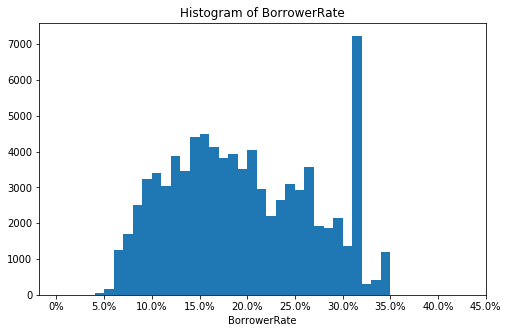

In [12]:
# start with a standard-scaled plot
bins = np.arange(0, df['BorrowerRate'].max()+0.01, 0.01)
ticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
labels = ['{}%'.format(v*100) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate',bins = bins)
plt.xlabel('BorrowerRate')
plt.xticks(ticks, labels )
plt.title('Histogram of BorrowerRate')
plt.show()

The distribution of brrower Rate is roughly bimodal with one peak around 15% another around 27%, and is a bit right skewed. There also is a single but very large spike near 31%.
I want to look into this large spike. 

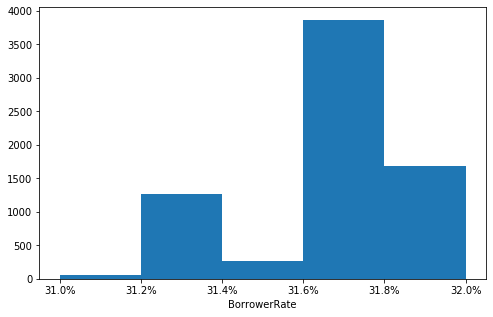

In [13]:
# use a set of smaller bins to look APR around 31%
df_near_31 = df.query('0.31 < BorrowerRate <0.32')
plt.figure(figsize=[8, 5])
bins = np.arange(0.31,0.32,0.002)
ticks = [0.31+i*0.002 for i in range(6)]
labels = ['{}%'.format(v*100) for v in ticks]
plt.hist(data = df_near_31, x = 'BorrowerRate', bins = bins);
plt.xticks(ticks, labels)
plt.xlabel('BorrowerRate')
plt.show();


There is a extrem high bar between 31.6% and 31.8%, it has nearly 4000 loans, is about 5% of all data sets. I will make some further research later.

Next, I want to see the characters of some basic aspect of loan(Term, ListingCreationDate, LoanOriginalAmount )

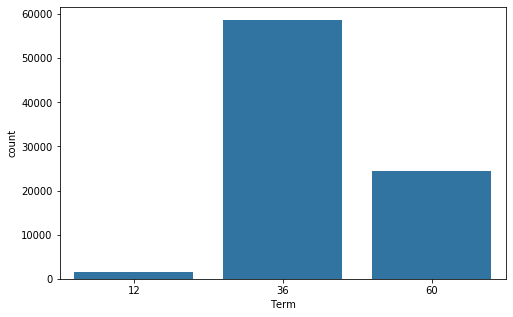

In [14]:
# plot Term with a standard-scaled plot
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term',color = base_color)
plt.show()


There are only 3 kind of terms, 1year, 3 years and 5 years. Most of the loans have the term of 3 years.

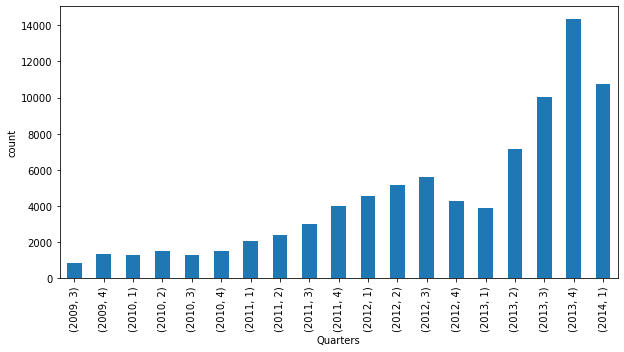

In [15]:
# plot the quarterly time distribution of loans
plt.figure(figsize=[10, 5])
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).count()['Term'].plot(kind = 'bar')
plt.xlabel('Quarters')
plt.ylabel('count')
plt.show()


Prosper relaunch its business at July 2009, that's just the first bar of the plot. The count of loans in each quarter keep increasing overtime, except Q4 2012 and Q1 2013 have a bit decrise. The fallen of Q1 2014 is probably because incomplete data. 

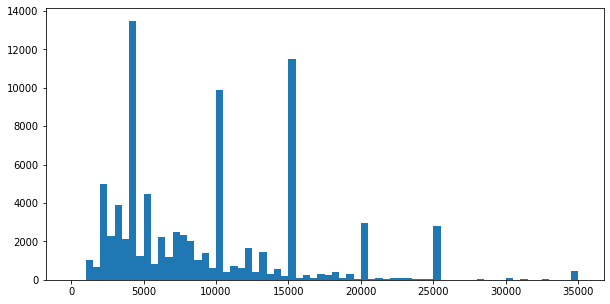

In [16]:
# standard plot of loan amount
plt.figure(figsize=[10, 5])
bins = np.arange(0, df.LoanOriginalAmount.max()+500, 500)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.show()


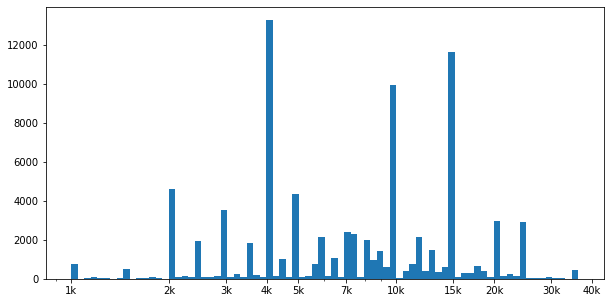

In [17]:
# there's a long tail in the distribution, I polt a log scale as addition
plt.figure(figsize=[10, 5])
ticks = [1000,2000,3000,4000,5000,7000,10000,15000,20000,30000,40000]
labels = ['1k','2k','3k','4k','5k','7k','10k','15k','20k','30k','40k']
bins = 10 ** np.arange(3, np.log10(df.LoanOriginalAmount.max())+0.02, 0.02)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.show()

The distribute of amount has a long tail on the right side with several very high spikes. It shows that most of the loans have a amount less than 10k, but at 15k, 20k and 25k there are three high counts. After ploted on a log-scale, I can see more clearly, the amount of most loans are multiples of 500, the most favorite amounts are 4k, 15k and 10k. Maybe that's mainly because people like the number with lots of zeros.

In [18]:
# I want to plot credit score related columns(Prosper Rating,Prosper Score and CreditScoreRange)
# First see what's the difference of CreditScoreRangeLower and CreditScoreRangeUpper
(df['CreditScoreRangeLower'] - df['CreditScoreRangeUpper']).value_counts()

-19.0    84853
dtype: int64

I can see every pair of lower and upper credit score have a differ of 19, so I only need to choose lower boundary to plot。

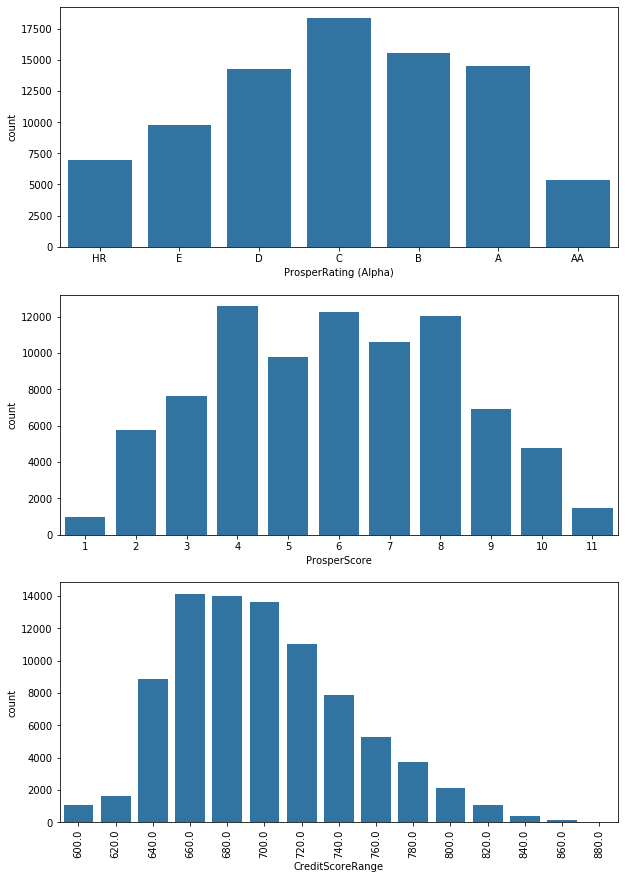

In [19]:
# plot all three credit related columns together(ProsperRating,ProsperScore and CreditScoreRangeLower).
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,15])

plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)',color = base_color)

plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'ProsperScore_order',color = base_color)
plt.xlabel('ProsperScore')

plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'CreditScoreRangeLower',color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('CreditScoreRange')
plt.show()


All three plots are roughly unimodal, and are not extremly left or right skewed. They show that, people with middle level credit (prosper rating C, prosper score from 4 to 8  or creditscore from 660 to 720) have the hightest number of loans.

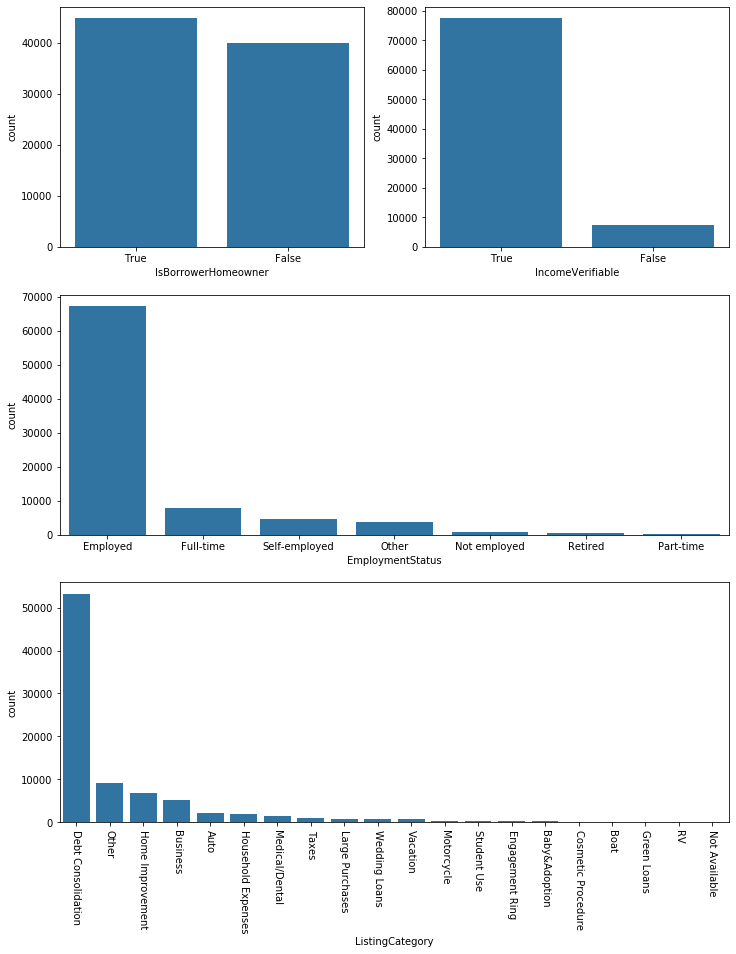

In [20]:
# plot the count of homeowner, employmentstatus and job category
plt.figure(figsize = [12,15])
base_color = sb.color_palette()[0]

plt.subplot(3, 2, 1)
category_order1 = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner',color = base_color, order = category_order1)

plt.subplot(3, 2, 2)
category_order1 = df['IncomeVerifiable'].value_counts().index
sb.countplot(data = df, x = 'IncomeVerifiable',color = base_color, order = category_order1)


plt.subplot(3, 2, (3,4))
category_order2 = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df, x = 'EmploymentStatus',color = base_color, order = category_order2)

plt.subplot(3, 2, (5,6))
category_order3 = df['ListingCategory (numeric)'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory (numeric)',color = base_color, order = category_order3)
plt.xticks(rotation = 270)
plt.xlabel('ListingCategory')

plt.show()


Most of the borrowers are homeowner, have a job and have their income verified.

Borrowed money are mainly used for debt consolidation, then used for home imporvement and business.

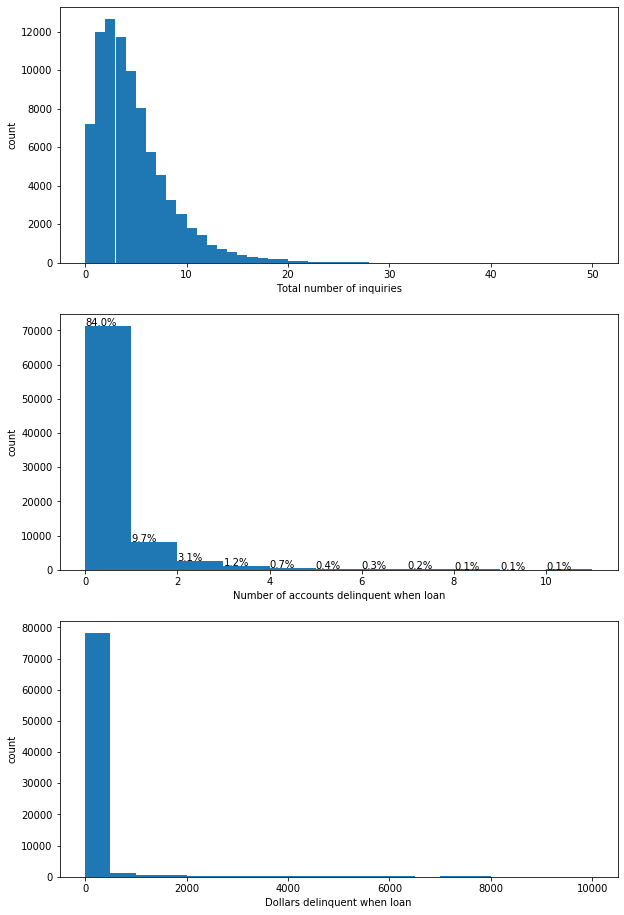

In [21]:
# plot totalinquiries,currentlinquiries,amountlinquiries
plt.figure(figsize = [10,16])
base_color = sb.color_palette()[0]

plt.subplot(3, 1, 1)
bins = np.arange(0,50+1,1)
plt.hist(data = df, x = 'TotalInquiries',color = base_color,bins = bins)
plt.xlabel('Total number of inquiries')
plt.ylabel('count')

plt.subplot(3, 1, 2)
bins = np.arange(0,11+1,1)
plt.hist(data = df, x = 'CurrentDelinquencies',color = base_color,bins = bins)
plt.xlabel('Number of accounts delinquent when loan')
plt.ylabel('count')
for i in range (11):
    count = df.CurrentDelinquencies.value_counts()[i]
    pct_string = '{:.1%}'.format(count/df.shape[0])
    plt.text(i,count+1,pct_string, va = 'baseline');

plt.subplot(3, 1, 3)
bins = np.arange(0,10000+500,500)
plt.hist(data = df, x = 'AmountDelinquent',color = base_color,bins = bins)
plt.xlabel('Dollars delinquent when loan')
plt.ylabel('count')

plt.show()

It shows that the vast majority of the borrowed have no or only a little delinquent history when loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The brrowerRate variable mainly falled between 4% and 35%, and is roughly bimodal distributed with the higher peak around 15% and lower peak around 27%.  There is a point near 31% with an extrem high count, and formed a very high spike. I will look deep into this in Bivariate Exploration.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the LoanOriginalAmount, it has a large range of values, I looked at the data using a log transform. Under the transformation, the data looked discrete distributed, the data gatherde at multiples of 500, and the most favorite amounts are 4k, 15k and 10k.


## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [22]:
# list all interested features
numeric_vars   = ['BorrowerRate', 'EstimatedLoss', 'LoanOriginalAmount','ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','OpenCreditLines',
                  'ListingCreationDate','TotalInquiries','CurrentDelinquencies', 'BankcardUtilization', 
                  'AvailableBankcardCredit','IncomeRange','StatedMonthlyIncome','Recommendations']
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeVerifiable','ProsperRating (Alpha)', 
                  'ProsperScore_order']


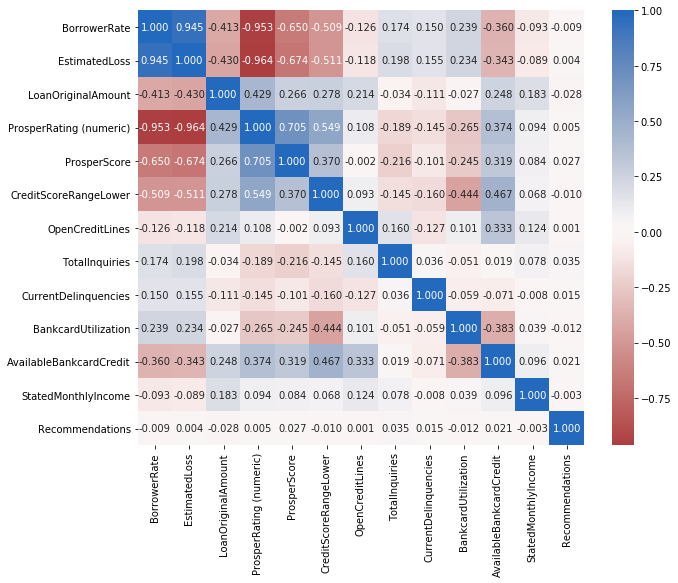

In [23]:
# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(df[numeric_vars].corr(), xticklabels=True, yticklabels=True,annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

'ProsperRating' is so high correlated with 'BorrowerRate' and 'estimated loss', it seems that APR should cover the estimated loss, and they are both mainly deceided by ProsperRating. 

'BorrowerRate' is also have some correlation with 'LoanOriginalAmount', 'ProsperScore', 'CreditScoreRangeLower', 'BankcardUtilization', 'AvailableBankcardCredit' and 'CurrentDelinquencies'(absolut correlation value >= 0.15)

'ProsperScore' is high and 'CreditScoreRangeLower','BankcardUtilization' are medium correlated to 'ProsperRating'

I'll choose fewer features to get scatter plots

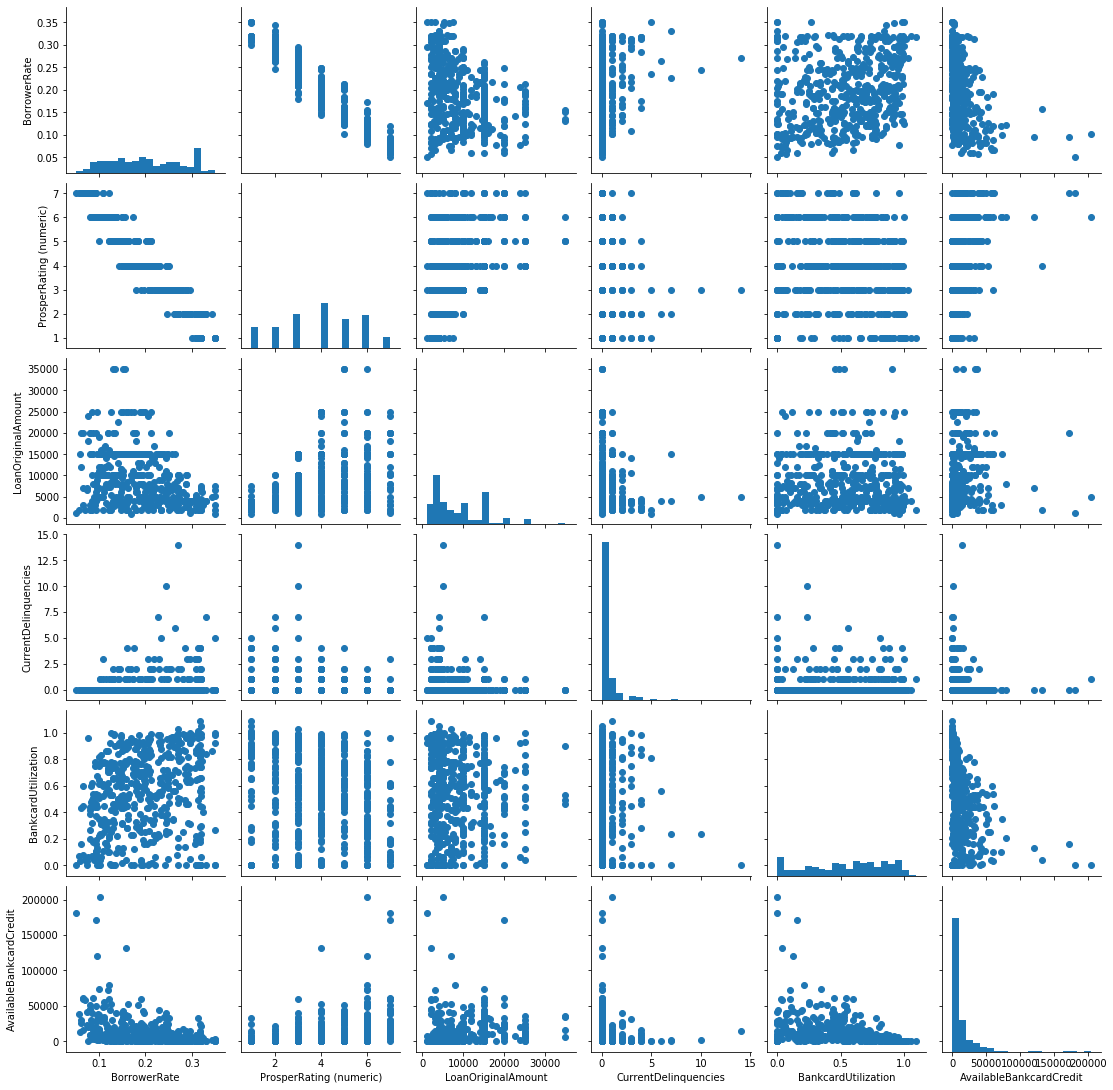

In [24]:
# choose a shorter list of numerical features.
numeric_vars_fewer = ['BorrowerRate','ProsperRating (numeric)','LoanOriginalAmount',
                      'CurrentDelinquencies','BankcardUtilization','AvailableBankcardCredit']

# plot matrix: sample 500 loans so that plots are clearer and they render faster
samples = df.sample(500,replace = False)

g = sb.PairGrid(data = samples, vars = numeric_vars_fewer)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

There are some interesting discoveries:
1. It shows again, BorrowerRate has a very strong correlation with ProsperRating.
2. When the loan amount increased, the BorrowerRate and BorrowerRate volatility both decreased. 
3. ProsperScore and CreditScore against BorrowRate have the similar pattern.The scatter plot for credit score and Rate is opposite, rate volatility convergent when credit score decrised. The relationship of these three variables worth extra exploration.
3. Although the correlation coefficient of rate and current delinquencies is not high(-0.15), the scatter plot shows that, if the borrower has a higher current delinquencies, he/she the minimum BorrowerRate will increase.
4. BorrowerRate and bankcard utilization rate are roughly positive correlated. At the same time, BorrowerRate and available bankcredit are negative correlated.I will also look deep into them later.

I'll move on to looking at how BorrowerRate and loan amount correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

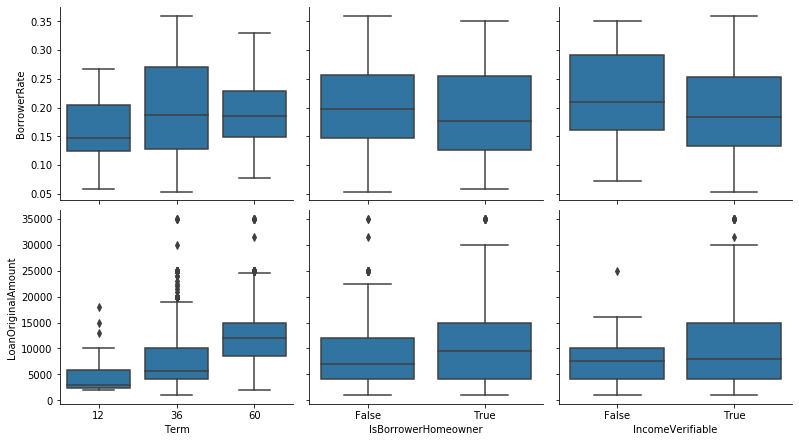

In [25]:
categoric_vars = ['Term','IsBorrowerHomeowner','IncomeVerifiable',
                  'ProsperRating (Alpha)', 'ProsperScore_order']

# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = df.sample(2000,replace = False)

#  Quick hack for creating box plots with seaborn's PairGrid. 
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = samples, y_vars = ['BorrowerRate', 'LoanOriginalAmount'], x_vars = categoric_vars[:3],
                height = 3, aspect = 1.2)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

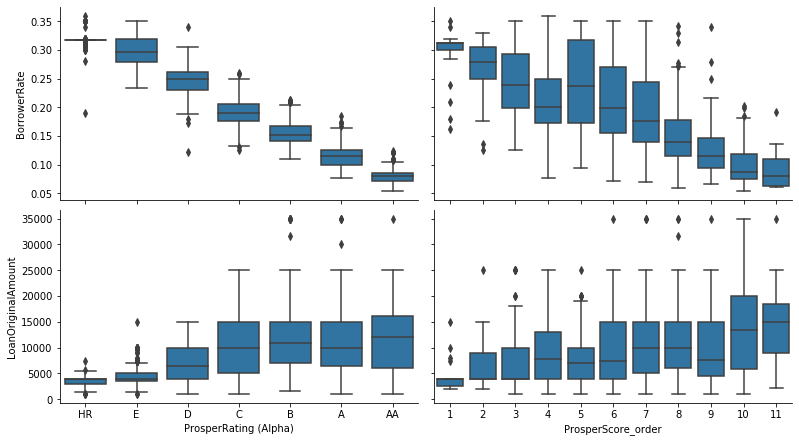

In [26]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = samples, y_vars = ['BorrowerRate', 'LoanOriginalAmount'], 
                x_vars = categoric_vars[3:],  height = 3, aspect = 1.8)
g.map(boxgrid)
plt.show();

It shows very clearly, the high borrower's rating and score, the lower the Rate. The 7 grade ProsperRating is even more obviously than ProsperScore. I belive Prosper use these Prosper rating to determin the base borrower Rate.

From the plot of rating/score vs loan amount, I can only find the borrower with low Rating/score can only borrow amount less than 10000.

As Prosper Rating has surprisingly high correlation with the BorrowerRate, and I know ProsperRating was affected by ProsperScore,  

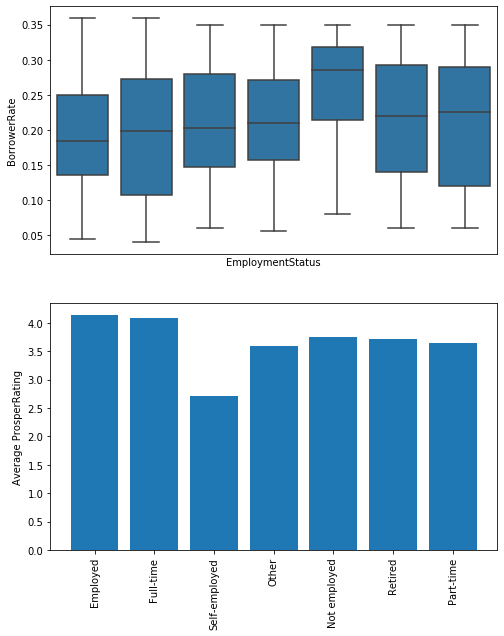

In [27]:
# see the relation with employment status using full dataset
plt.figure(figsize = [8,10])

# plot APR vs employment status
plt.subplot(2,1,1)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate',color = base_color, 
           order = df['EmploymentStatus'].value_counts().index)
plt.xticks([]);

# plot average ProsperRating in each employment status
plt.subplot(2,1,2)
plt.bar(x = df['EmploymentStatus'].value_counts().index, 
        height = df.groupby('EmploymentStatus').mean()['ProsperRating (numeric)'])
plt.xticks(rotation = 90)
plt.ylabel('Average ProsperRating')
plt.show;

unemployed borrower's APR is higher than all other categories. And employed and full time have a higher Prosper rating.

Next, I will select several categorical features, and find their relationships.

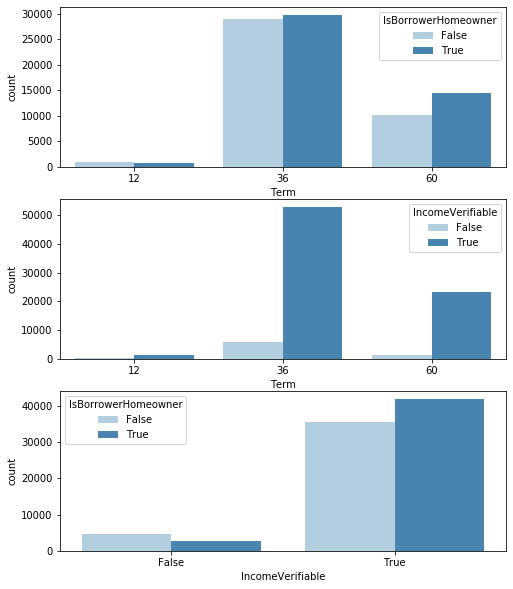

In [28]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 10])

# subplot 1: term vs homeowner
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'Term', hue = 'IsBorrowerHomeowner', palette = 'Blues')

# subplot 2: term vs IncomeVerifiable
plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'Term', hue = 'IncomeVerifiable', palette = 'Blues')

# subplot 1: homeowner vs IncomeVerifiable
plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IncomeVerifiable', hue = 'IsBorrowerHomeowner', palette = 'Blues')

plt.show()

There are more homeowner than non_honmewoner among 5 year term loans and alos more homewoner in group of income verifiated. 

But among medium and short term loans,or in unferified loans, more borrowers are not homeowner. It seems that homeowner is more trustworthy.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how main loan data change along the timeline.

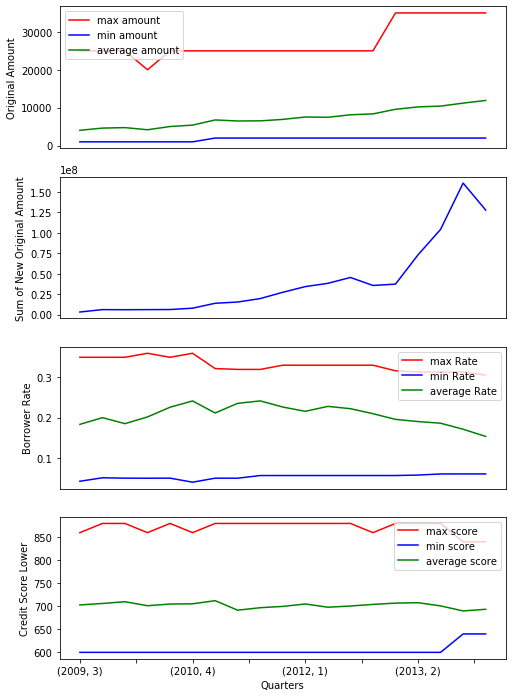

In [29]:
# plot the quarterly time distribution of loans
plt.figure(figsize=[8, 12])

plt.subplot(4,1,1)
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).max()['LoanOriginalAmount'].plot(kind = 'line',color = 'r')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).min()['LoanOriginalAmount'].plot(kind = 'line',color = 'b')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).mean()['LoanOriginalAmount'].plot(kind = 'line',color = 'g')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Original Amount')
plt.legend(loc = 2,labels = ('max amount', 'min amount', 'average amount'))

plt.subplot(4,1,2)
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).sum()['LoanOriginalAmount'].plot(kind = 'line',color = 'b')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Sum of New Original Amount')

plt.subplot(4,1,3)
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).max()['BorrowerRate'].plot(kind = 'line',color = 'r')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).min()['BorrowerRate'].plot(kind = 'line',color = 'b')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).mean()['BorrowerRate'].plot(kind = 'line',color = 'g')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Borrower Rate')
plt.legend(labels = ('max Rate', 'min Rate', 'average Rate'))

plt.subplot(4,1,4)
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).max()['CreditScoreRangeLower'].plot(kind = 'line',color = 'r')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).min()['CreditScoreRangeLower'].plot(kind = 'line',color = 'b')
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).mean()['CreditScoreRangeLower'].plot(kind = 'line',color = 'g')
plt.xlabel('Quarters')
plt.ylabel('Credit Score Lower')
plt.legend(labels = ('max score', 'min score', 'average score'))

plt.show()


Timeline is a good way to see how Prosper changed its loan policy.
1. At the first quarter of 2011, Prosper rised its minimum loan amount from 1000 to 2000. Around the first quarter of 2013, Prosper began to have loan large than 25000. Average loan amount is increasing over time.
2. The total new original loan amount has been increasing overall, it reached peak around the second quarter of 2013, and then begin to fall.
3. Over time, The max BorrowerRate is decresing, and min BorrowerRate is increasing, leads to the differ between max and min BorrowerRate is narrowing. The average BorrowerRate is decreasing from the first quarter of 2011, that's when prosper change its policy to increase minimun loan amount.
4. From the minmium credit score line, we can see after relaunch its business, Prosper set its minimun requirement to 600, then around the first quarter of 2014, it raised its minimun level again to 640.

Then I want to take a look at BorrowerRate distribution on different level of amount.

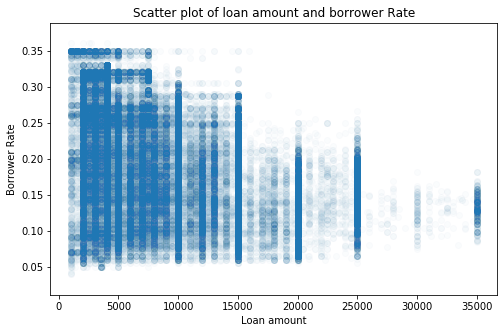

In [30]:
# plot the scatter of APR and loan amount
plt.figure(figsize = [8,5])
plt.scatter(data = df, x = 'LoanOriginalAmount' , y = 'BorrowerRate',alpha = 1/50)
plt.xlabel('Loan amount')
plt.ylabel('Borrower Rate')
plt.title('Scatter plot of loan amount and borrower Rate')
plt.show()

Points are concentrated at the left side of loan amount(x axis) and also concentrated at points those are multiples of 500, especially multiples of 5000. I also can see, the larger the amount, the less volatility of APR distributed, just as analyzed before. 

For there are too many pintis, I will group them by Prosper rating in multivariate section.
Now I will find some statistic values of this group method.

In [31]:
# cut the amount feature to several 2500 width bins
bins_amount = np.arange(0,35000+2500,2500)
df['amount_binned'] = pd.cut(df['LoanOriginalAmount'], bins_amount, include_lowest = True)


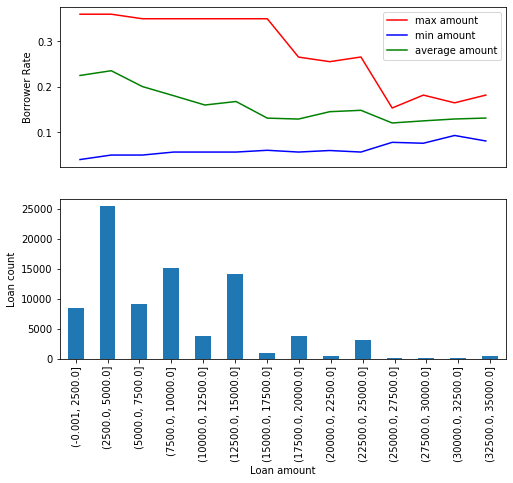

In [32]:
plt.figure(figsize=[8, 10])

# plot the bar chart
plt.subplot(3,1,1)
df.groupby('amount_binned')['BorrowerRate'].max().plot(kind = 'line', color = 'r')
df.groupby('amount_binned')['BorrowerRate'].min().plot(kind = 'line', color = 'b')
df.groupby('amount_binned')['BorrowerRate'].mean().plot(kind = 'line', color = 'g')
plt.xlabel('')
plt.xticks([])
plt.ylabel('Borrower Rate')
plt.legend(labels = ('max amount', 'min amount', 'average amount'))

plt.subplot(3,1,2)
df.groupby('amount_binned')['Term'].count().plot(kind = 'bar')
plt.ylabel('Loan count')
plt.xlabel('Loan amount')

plt.show()

Both plots match the scatter plot. differ of Rate narrowing from 30% to about 10%, and the majority of loans are less than 15K.

Finally, I want to look into the accumulation of loans with APR near 35%.

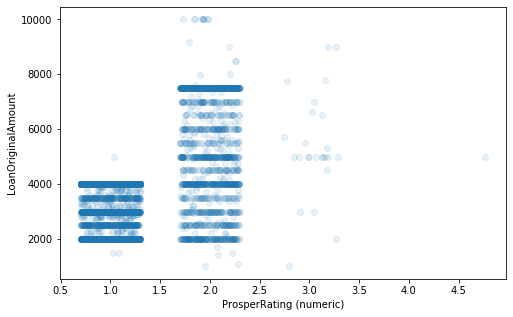

In [33]:
# get a scatter plot of rating and amount for the small dataset
df_larger_31 = df.query('0.31 < BorrowerRate <0.32')
plt.figure(figsize=[8, 5])
sb.regplot(data = df_larger_31, x = 'ProsperRating (numeric)', y = 'LoanOriginalAmount',x_jitter = 0.3,
           scatter_kws = {'alpha':1/10},fit_reg = False);

plt.show();

There more than 6000 loans between 31% and 32% BorrowerRate. I can see the vast majority of them have amount less than 7500, and are in the lowest two rating categories.
It seems that a large part of these borrowers have not good enough qualification, so they have to accecpt a higher APR and smaller amount.
So, someone have some defect of his credit history, if he want to borrow some money from Prosper, he has a higher possiblity to get a small amount with 31%-32% or higher rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

BorrowerRate has a surprisingly high correlation with the Prosper Rating.I think how to get Prosper Rating is the most important part of Prosper's algorithm. Features such as BankcardUtilization, number of delinquent, homeowner,income verified, employment status also effecte the BorrowerRate. some of these features has been considered when setting the Prosper Rating base level, some other features adjusted the BorrowerRate from base levels.

Besides, from the timeline of the data, We can see Prosper changed some basic requirements.
Such as rised its minimum loan amount from 1000 to 2000 in 2011, and increasing minumum credit score 3 times.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Prosper Rating have medium correlation with ProsperScore, credit score and Bankcard Utilization. I believe Prosper's algorithm use these features combined with something else to get someone's Prosper Rating.

Prosper Rating has positive correlation with loan amount HR,E,D,C levels, but have no obvious correlation at higher level of Prosper Rating.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how to deside the APR with in each Prosper Rating.

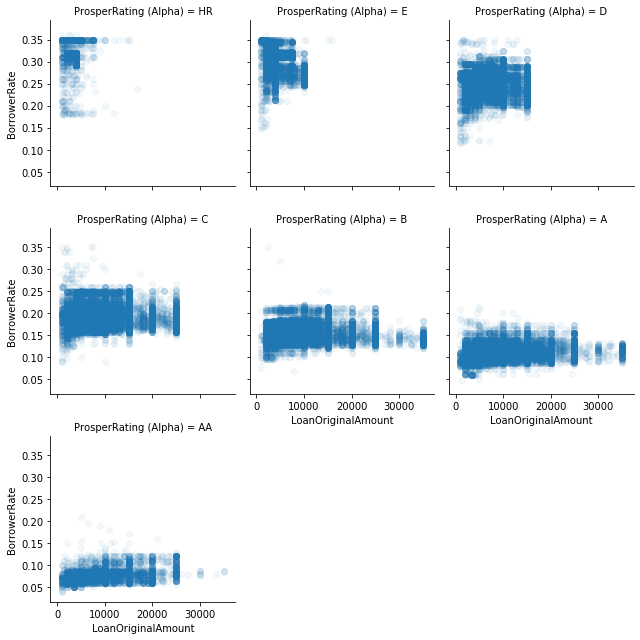

In [34]:
# Check the relationship between BorrowerRate and loan amount with in each Prosper Rating.

g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 3) 
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate',  fit_reg = False,scatter_kws={'alpha':1/20})
plt.show();

It shows clearly, there are loan amount ceilings for each Prosper Rating(after removing some outliers)

- Borrowers with Prosper Rating at HR and E, they can borrow at most 10k
- Borrowers with Prosper Rating at D, they can borrow at most 15k
- Borrowers with Prosper Rating at C, they can borrow at most 25k
- Borrowers with Prosper Rating at AA,A or B, they can borrow at most 35k

It also shows in most rating subplots, Borrower APR has some possitive correlation with the loan amount.

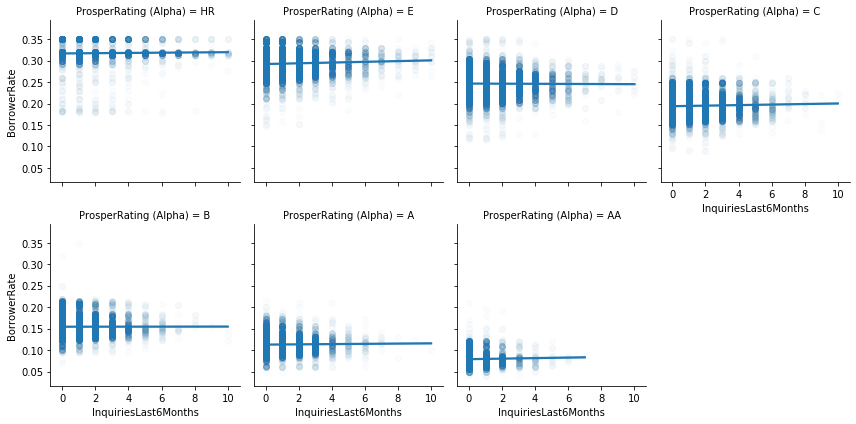

In [35]:
# Check the relationship between BorrowerRate and InquiriesLast6Months with in each ProsperRating.
df1 = df[df['InquiriesLast6Months'] <= 10] # get rid of some extrem large outliers
g = sb.FacetGrid(data = df1, col =  'ProsperRating (Alpha)',col_wrap = 4) 
g.map(sb.regplot, 'InquiriesLast6Months', 'BorrowerRate',  fit_reg = True,scatter_kws={'alpha':1/50})
plt.show();

When InquiriesLast6Months increases, APR increase slightly. I think this is reasonable, because, if someone inquirs too many time for loans, either he or she needs a large amount of money, or other peer to peer company has rejected his or hers request, both of these situation will lead to higher risk. Higher risk need high APR to hedge.

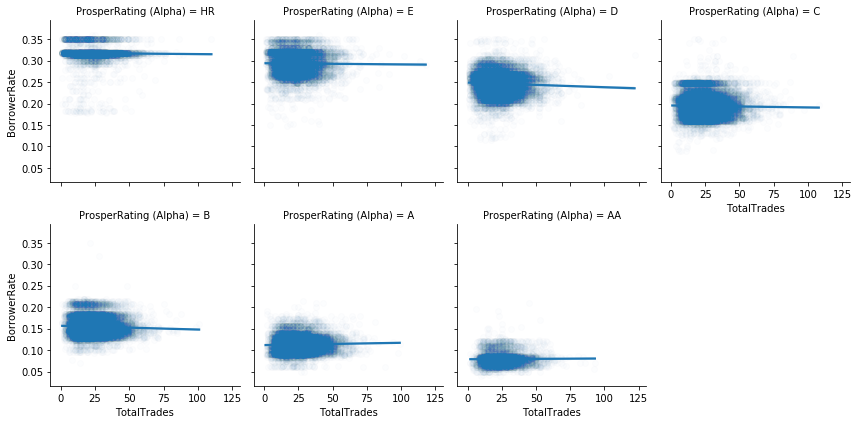

In [36]:
# Check the relationship between BorrowerRate and TotalTrades with in each ProsperRating.
g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 4) 
g.map(sb.regplot, 'TotalTrades', 'BorrowerRate',  fit_reg = True,scatter_kws={'alpha':1/100})
plt.show();


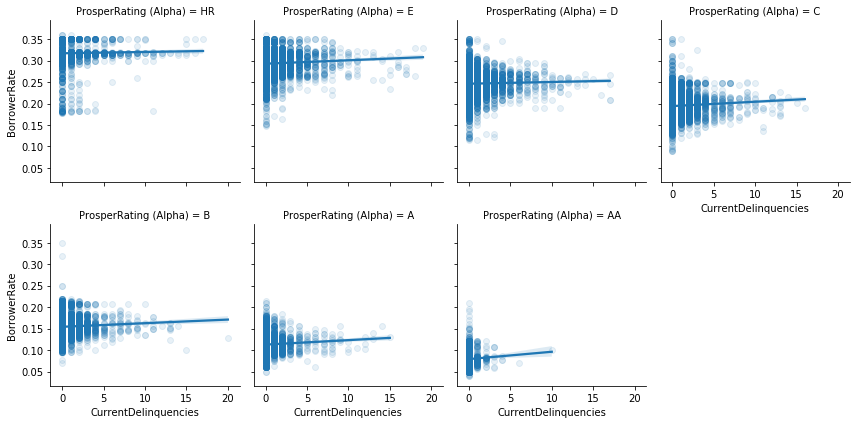

In [37]:
# Check the relationship between BorrowerRate and current Delinquencies with in each ProsperRating.
df1 = df[df['CurrentDelinquencies'] <= 20]
g = sb.FacetGrid(data = df1, col =  'ProsperRating (Alpha)',col_wrap = 4) # set hue to a column
g.map(sb.regplot, 'CurrentDelinquencies', 'BorrowerRate', fit_reg = True,scatter_kws={'alpha':1/10})
plt.show();

The larger the number of accounts delinquent, the higher the APR, this trend is much obvious, this is also reasonable, higher opportunity of delinquent means higher risk.

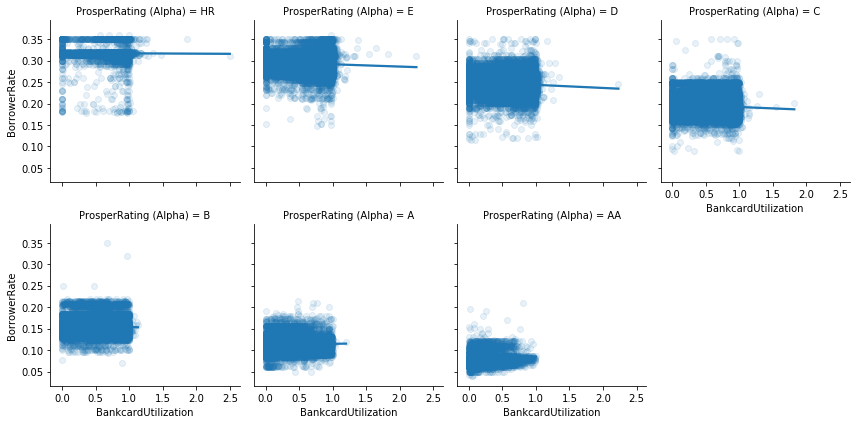

In [38]:
# Check the relationship between BorrowerRate and BankcardUtilization with in each ProsperRating.

g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 4) 
g.map(sb.regplot, 'BankcardUtilization', 'BorrowerRate',  fit_reg = True,scatter_kws={'alpha':1/10})
plt.show();

For Prosper rating level AA, A and B, the higher The percentage of available revolving credit that is utilized, the higher the APR, but for the rest of the Prosper rating level, they have the opposite trend.
It's a bit difficult to understand, maybe that's also because of the uneven distribution.


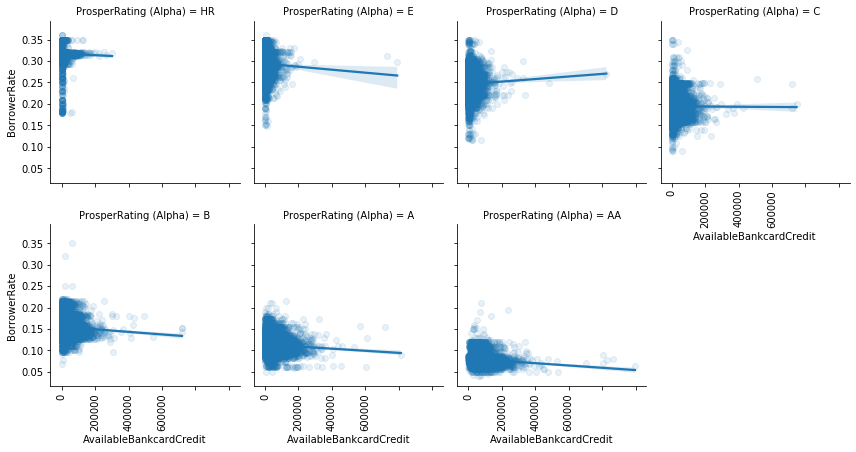

In [39]:
# Check the relationship between BorrowerRate and AvailableBankcardCredit with in each ProsperRating.

g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 4) 
g.map(sb.regplot, 'AvailableBankcardCredit', 'BorrowerRate',  fit_reg = True,scatter_kws={'alpha':1/10})
g.set_xticklabels(rotation = 90)
plt.show();

When I look at the relationship between APR and Available Bankcard Credit, this make sence, more available cerdit means higher ability to borrow another loan.

/Users/xuhao3/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


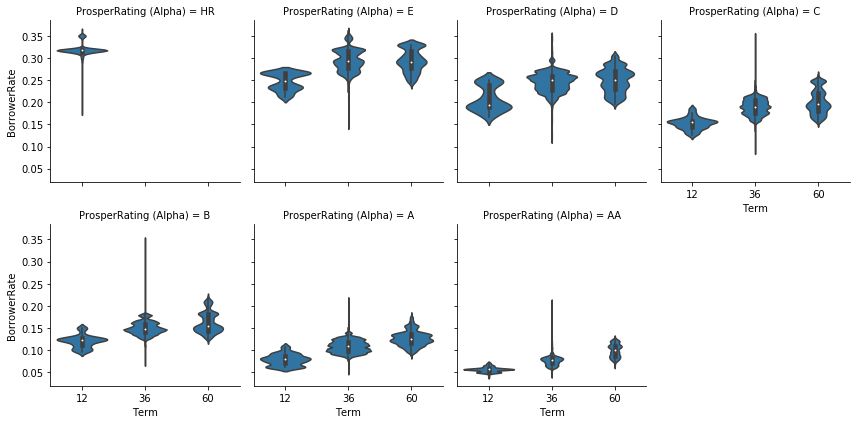

In [40]:
# Check the relationship between BorrowerRate and term with in each ProsperRating.
g = sb.FacetGrid(data = df, col =  'ProsperRating (Alpha)',col_wrap = 4) 
g.map(sb.violinplot, 'Term', 'BorrowerRate')



It's very clear, the longer the term, the higher the APR.

Next, I will get some pointplot for better visualization.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

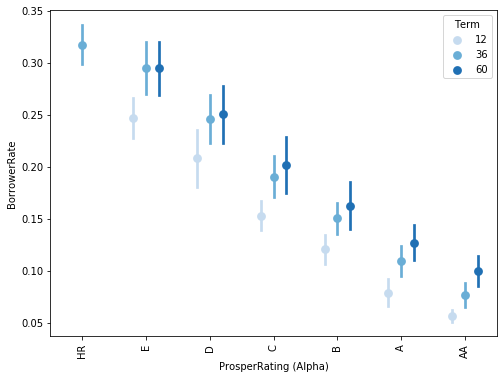

In [41]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '',dodge = 0.4, ci='sd')
plt.xticks(rotation = 90)



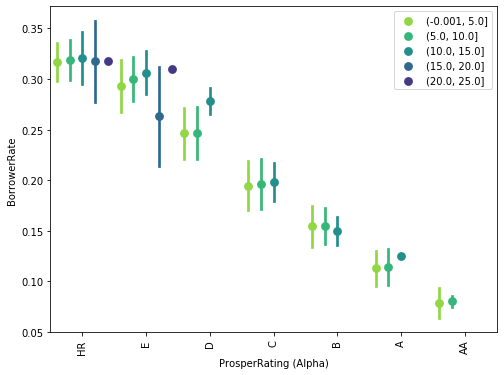

In [42]:
# cut the amount feature to several 2500 width bins
bins_amount = np.arange(0,25+5,5)
df['InquiriesLast6Months_binned'] = pd.cut(df['InquiriesLast6Months'], bins_amount, include_lowest = True)



fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x ='ProsperRating (Alpha)', y = 'BorrowerRate' , hue = 'InquiriesLast6Months_binned',
           palette = 'viridis_r', linestyles = '',dodge = 0.8, ci='sd')
plt.legend(loc = 1)
plt.xticks(rotation = 90)
plt.show();


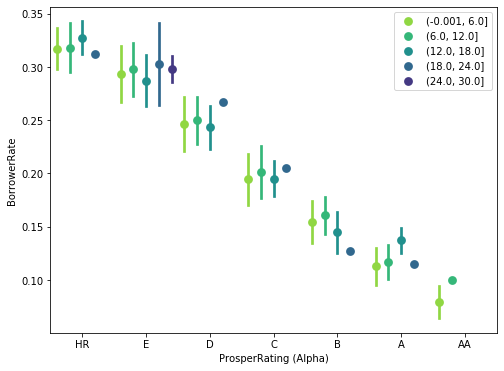

In [43]:
# cut the amount feature to several 2500 width bins

bins_amount = np.arange(0,30+6,6)
df['CurrentDelinquencies_binned'] = pd.cut(df['CurrentDelinquencies'], bins_amount, include_lowest = True)

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x ='ProsperRating (Alpha)', y = 'BorrowerRate' , hue = 'CurrentDelinquencies_binned',
           palette = 'viridis_r', linestyles = '',dodge = 0.8, ci='sd')
plt.legend(loc = 1)
plt.show();



In [44]:
df.CurrentDelinquencies.value_counts()

0.0     71252
1.0      8223
2.0      2631
3.0      1039
4.0       611
5.0       310
6.0       232
7.0       167
8.0       106
9.0        79
10.0       54
11.0       43
13.0       26
12.0       23
15.0       12
14.0       11
17.0        9
16.0        9
21.0        5
24.0        2
18.0        2
27.0        2
19.0        1
22.0        1
32.0        1
20.0        1
51.0        1
Name: CurrentDelinquencies, dtype: int64

The trend is not very clear, after I see the value_counts, there are some outliers, I can replot by ignore the CurrentDelinquencies higher than 10.

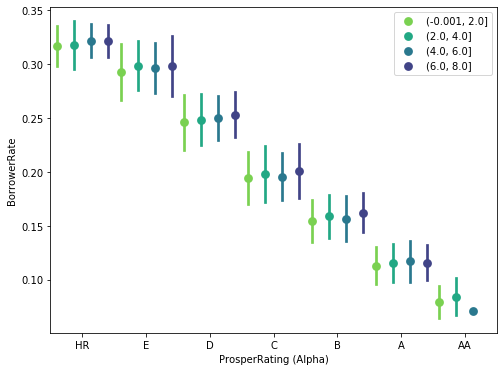

In [45]:
bins_amount = np.arange(0,8+2,2)
df['CurrentDelinquencies_binned'] = pd.cut(df['CurrentDelinquencies'], bins_amount, include_lowest = True)

fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x ='ProsperRating (Alpha)', y = 'BorrowerRate' , hue = 'CurrentDelinquencies_binned',
           palette = 'viridis_r', linestyles = '',dodge = 0.8, ci='sd')
plt.legend(loc = 1)
plt.show();



Now the trend is much clear.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Borrow Rate against Prosper rating by looking for what cause the adjustment of Rate within each Prosper rating category. After ploting, Term is a very important features, in every Prosper rating, longer term always has a higher rate. Other characters related to borrower credit or behavior patten also have some correlation, in most of the Prosper rating, these features has the consistent correlation with Borrower Rate, but for uneven distributed data and some outlaiers, these features occasionally shows a opposite relationship. After I remove some outliers, the realtionship is much obviouser.

### Were there any interesting or surprising interactions between features?

Those features I explored are not independent, features like CurrentDelinquencies and InquiriesLast6Months have some correlation.
And the relation among minimum loan amount, Prosper Rating and timeline shows how prosper adjust its loan entry requirement and pricing pattern.